In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# FAVOURITE PUBLISHERS BASED ON DEPARTMENTS
<p>In our library there are differnt books that are published by various publishers
 In this analysis ,we are trying to convey the popularity of publishers among students and visualizing their trends according to specific time period.</p>

## Favourite publisher (all books in library)

</p>
First, let us take count of publishers available in library. There could be a reason why this publishers books are abundant in library. Here, we consider copies of same book as separate books.
</p>




In [2]:
# Variables that can be manipulated by widgets
rank = 10
chart_type = "pie"
start_dt = "2016-05-06"
end_dt = "2022-06-08"
depts = ['GENERAL', 'CS', 'IT', 'EC', 'ME', 'MECHANICAL',
         'INFORMATION TECHNOLOGY', 'COMPUTER SCIENCE', 'M Tech CS CL',
         'EEE', 'ELECTRONICS AND COMMUNICATION', 'Ph.D', 'PHYSICS', 'CE',
         'ECONOMICS', 'ELECTRICAL', 'M Tech ME ROB', 'CENTRAL LIBRARY',
         'CIVIL', 'MATHEMATICS', 'CHEMISTRY']


In [3]:
#dataframe of all books in library
df2 = pd.read_csv('src/clean1_bookDetails.csv')
dfu = pd.read_csv("src/unq_bks2.csv", index_col=0)

In [4]:
df3=df2['publisher'].value_counts().sort_values(ascending=False).head(int(rank))
#df3

In [5]:
# function to add lables above bar plot
def addlabels(x, y):
	for i in range(len(x)):
		plt.text(i, y[i], y[i], ha='center')

In [6]:
# Creating  two lists for plotting graph
def series_to_list(df, rank=100):
    """
    Convert pandas series object to two lists x and y. 
    This makes plotting graph with matplotlib easier.
    We only consider maximum of 100 values for plotting graph.
    """
    count = 0
    x , y = [], []
    for i, j in df.iteritems():
        x.append(i)
        y.append(j)
        count += 1
        if count == rank:
            break
    return (x, y)

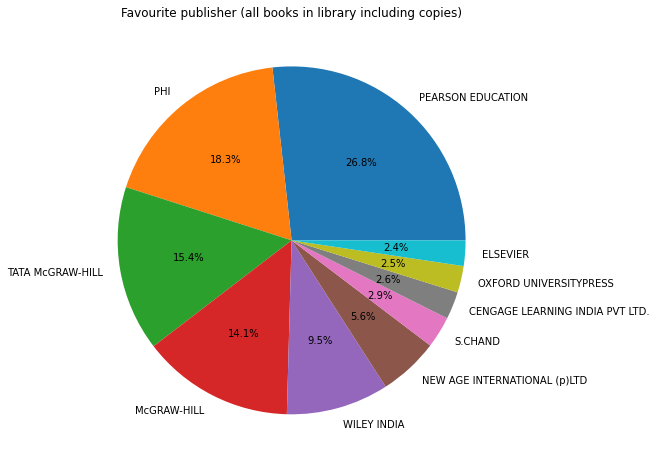

In [7]:
# Creating  two lists for plotting graph
x, y = series_to_list(df3)

if (chart_type == "bar"):
    plt.figure(figsize=(10, 5))
    plt.bar(x, y)
    # Adding count above bar
    addlabels(x, y)
    # vertically align x axis values
    plt.xticks(range(len(x)), x, rotation='vertical')
    plt.title(f"Favourite Pubblisher (all  books in library including copies)")
    plt.xlabel("Publisher")
    plt.ylabel("Number of Books")
    plt.show()
elif(chart_type == "pie"):
    fig = plt.figure(figsize=(13, 8))
    # use autopct to show percentage on diagram
    plt.pie(y, labels=x, autopct='%1.1f%%')
    plt.title(f"Favourite Publisher (all books in library including copies)")
    plt.show()


In [8]:
df3

PEARSON EDUCATION                  4708
PHI                                3218
TATA McGRAW-HILL                   2703
McGRAW-HILL                        2489
WILEY INDIA                        1677
NEW AGE INTERNATIONAL (p)LTD        981
S.CHAND                             517
CENGAGE LEARNING INDIA PVT LTD.     450
OXFORD UNIVERSITYPRESS              434
ELSEVIER                            416
Name: publisher, dtype: int64

## Favourite Publisher (from book issue)

<p> Now lets find which  are the popular publishers based on book issue details. We can find popular publishers of each department by selecting department form left panel.

Since this data is generated inside an academic library, it has strong conection with syllabus and curriculum. Because generally, most of the users (who are students) choose books related to what they study in classrooms. So change in syllabus can change 'favourites' of books.

That is why the time is important. From the left panel you can select time period. Based on time period and departments we first filter our dataset. Then we plot publisher v/s number of issues using same method discussed earlier. </p>

<ul>While passing arguments please consider the following tips; </ul>

<ul>
    <li> Start date must be lower than end date.</li>
   <li>  Start date must be greater than 2016-05-06.</li>
   <li>  End date must be lower than 2022-06-08.</li>
    <li> Pass dates only in YYYY-MM-DD format (eg: 2022-06-05).</li>
   <li>  Select atleast one department.</li>
    <li> Adjust the rank variable to display more results.</li>
 </ul>

In [9]:
df = pd.read_csv("src/bkIssue_libUser_bkDetails.csv")


In [10]:
df.drop (['acc_no','sl_no','checked_in(Y/N)','book_issued(Y/N)', 'sex'], 1, inplace=True)
df['issue_date'] = pd.to_datetime(df['issue_date'],dayfirst=True)
df=df.dropna()

/tmp/ipykernel_11036/1886081506.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop (['acc_no','sl_no','checked_in(Y/N)','book_issued(Y/N)', 'sex'], 1, inplace=True)


In [11]:
#Counting number of books
df1 = df['publisher'].value_counts().sort_values(ascending=False).head(int(rank))
#df1

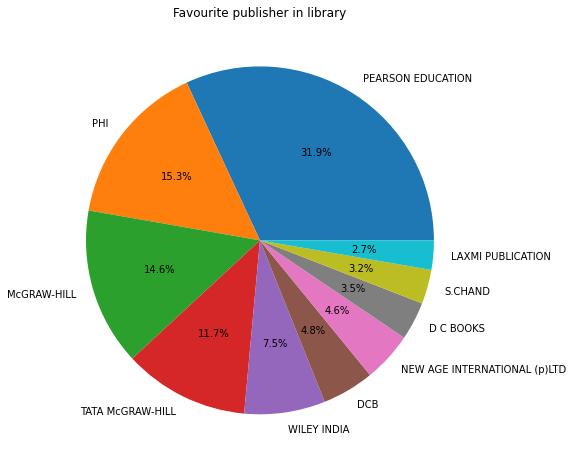

In [12]:
x, y = series_to_list(df1)

if (chart_type == "bar"):
    plt.figure(figsize=(13, 8))
    plt.bar(x, y)
    # Adding count above bar
    addlabels(x, y)
    plt.xticks(range(len(x)), x, rotation='vertical') # vertically align x axis values
    plt.title(f"Favourite  publisher in library")
    plt.xlabel("publisher")
    plt.ylabel("Number of books")
    plt.show()
elif(chart_type == "pie"):
    fig = plt.figure(figsize=(13, 8))
    # use autopct to show percentage on diagram
    plt.pie(y, labels=x, autopct='%1.1f%%')
    plt.title(f"Favourite publisher in library")
    plt.show()

In [13]:
df1

PEARSON EDUCATION               9065
PHI                             4353
McGRAW-HILL                     4158
TATA McGRAW-HILL                3310
WILEY INDIA                     2136
DCB                             1373
NEW AGE INTERNATIONAL (p)LTD    1318
D C BOOKS                       1007
S.CHAND                          904
LAXMI PUBLICATION                773
Name: publisher, dtype: int64